In [1]:
import csv
from sklearn.linear_model import enet_path
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plot

In [2]:
labels = []
xData = []
names = []

lineCount = 0
with open("s1rgb.csv", newline='') as csvfile:
    data = csv.reader(csvfile, delimiter='\t')
    for line in data:
        if lineCount == 0:
            lineCount += 1
        elif lineCount == 1:
            lineCount +=1
            names = line[1:]
        else:
            labels.append(float(line[4]))
            line.pop(4)
            xData.append(line[1:])

print(names, "\n")
print(xData[0:5], "\n")
print(labels[0:10])

['s1-band_1_S_M_M_M:byte', 's1-band_2_S_M_M_M:byte', 's1-band_3_S_M_M_M:byte', 'band_1_S_M_M:byte'] 

[['42', '15', '250'], ['42', '15', '250'], ['34', '29', '113'], ['34', '29', '113'], ['33', '30', '104']] 

[12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0]


In [3]:
rowCount = len(xData)
columnCount = len(xData[0])
print("rowCount:", rowCount, "columnCount:", columnCount)
print(len(labels))
for i in range(len(labels)):
    if 1 <= labels[i] <= 11:
        labels[i] = 1
    elif 12 <= labels[i] <= 22:
        labels[i] = 2
    elif 23 <= labels[i] <= 34:
        labels[i] = 3
    elif 35 <= labels[i] <= 39:
        labels[i] = 4
    else:
        labels[i] = 5
labelset = set(labels)
print("Label set:")
print(labelset)

rowCount: 34485262 columnCount: 3
34485262
Label set:
{1, 2, 3, 4, 5}


In [4]:
x_train, x_test, y_train, y_test = train_test_split(xData, labels, test_size=0.3)

misClassError = []
for iTrees in [20]:
    #iTrees += 1
    print("iTrees:", iTrees)
    rsModel = ensemble.RandomForestClassifier(n_estimators=iTrees, random_state=0)
    rsModel.fit(x_train, y_train)
    result = rsModel.predict(x_test)
    correct = accuracy_score(y_test, result)
    misClassError.append(1.0 - correct)
    print("Cor, Misclassification Error")
    print(correct, misClassError[-1])

    pList = result.tolist()
    confusionMat = confusion_matrix(y_test, pList)
    print("")
    print("Confusion Matrix")
    print(confusionMat)
    print("")

iTrees: 20
Cor, Misclassification Error
0.782720232478 0.217279767522

Confusion Matrix
[[   2423   63822  195837      81    1985]
 [   1598 2295439 1112608    1059   11905]
 [   1986  581796 5442759     542   61073]
 [     60   47498   35908     684    2091]
 [    218   33434   94312      72  356389]]



[2 0 1]
['s1-band_1_S_M_M_M:byte', 's1-band_2_S_M_M_M:byte', 's1-band_3_S_M_M_M:byte', 'band_1_S_M_M:byte']
4
17
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 's1-red', 's1-green', 's1-blue', 'band-4']
['B3', 'B1', 'B2']


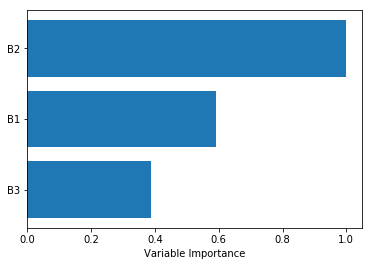

In [5]:
featureImportance = rsModel.feature_importances_
featureImportance = featureImportance / featureImportance.max()
idxSorted = np.argsort(featureImportance)
print(idxSorted)
print(names)
print(len(names))
names = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 's1-red','s1-green','s1-blue', 'band-4']
print(len(names))
print(names)
names2 = []
for i in idxSorted:
    names2.append(names[i])
print(names2)
barPos = np.arange(idxSorted.shape[0]) + .5
plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, names2)
plot.xlabel('Variable Importance')
plot.show()

In [7]:
print(result[0:100])
rgblist = []
for row in result:
    if row == 1:
        rgblist.append([255,0,0])
    elif row == 2:
        rgblist.append([255,255,0])
    elif row == 3:
        rgblist.append([0,255,0])
    elif row == 4:
        rgblist.append([51,153,255])
    else:
        rgblist.append([127,0,255])
print(rgblist[0:20])

[3 3 2 2 2 3 2 2 3 2 3 3 2 3 3 3 2 2 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3
 2 3 3 3 3 2 3 2 2 2 3 2 3 3 3 3 3 2 5 3 2 3 3 3 2 5 3 3 2 3 3 3 3 3 3 3 3
 3 3 2 3 3 2 3 3 3 2 3 3 3 5 3 3 3 3 3 3 3 3 3 2 3 3]
[[0, 255, 0], [0, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 255, 0], [255, 255, 0], [255, 255, 0], [0, 255, 0], [255, 255, 0], [0, 255, 0], [0, 255, 0], [255, 255, 0], [0, 255, 0], [0, 255, 0], [0, 255, 0], [255, 255, 0], [255, 255, 0], [255, 255, 0], [0, 255, 0]]


In [9]:
with open('s1rgbprediction.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in rgblist:
        writer.writerow(row)